# Лабораторная №6

##  Вариант №15

In [1]:
import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt
%matplotlib inline 

## Аналитический метод

In [2]:
def solve_analytically(matrix_c):
    u = np.ones(matrix_c.shape[0])
    v = 1/(u.dot(inv(matrix_c)).dot(u))
    x_star = u.dot(inv(matrix_c))*v
    y_star = inv(matrix_c).dot(u)*v
    
    return {
        'x_strategies' : x_star,
        'y_strategies' : y_star,
        'v' : v
    }

## Метод Брауна-Робинсон

In [3]:
# выбор стратегий игроков
def brown_robinson_step(a_strats_count, b_strats_count, matrix_c):
    a_gains = matrix_c.dot(b_strats_count)
    b_gains = a_strats_count.dot(matrix_c)
    
    indexes = np.linspace(0, matrix_c.shape[0] - 1, matrix_c.shape[0], dtype=int)
    
    a_max_ids = indexes[np.isin(a_gains, np.max(a_gains))]
    b_min_ids = indexes[np.isin(b_gains, np.min(b_gains))]
    
    return np.random.choice(a_max_ids, 1)[0], np.random.choice(b_min_ids, 1)[0]

def solve_brown_robinson(matrix_c, requred_epsilon=0, max_steps=100000):
    a_strats_count = np.zeros(matrix_c.shape[0])
    b_strats_count = np.zeros(matrix_c.shape[1])
    
    epsilon_history = []
    epsilon = 0
    
    i = 0
    j = 0
    k = 0
    # Задание числа, заведомо большего чем требуемая погрешность
    epsilon = 2
    
    v_overline_min_k = 9999999.
    v_underline_max_k = 0.
    
    while k < max_steps and epsilon > requred_epsilon:
        a_strats_count[i] += 1
        b_strats_count[j] += 1
        k += 1
        
        i, j = brown_robinson_step(a_strats_count, b_strats_count, matrix_c)
        
        v_overline = np.max(matrix_c.dot(b_strats_count))
        v_underline = np.min(a_strats_count.dot(matrix_c))
        
        v_overline_min_k = min(v_overline/k, v_overline_min_k)
        v_underline_max_k = max(v_underline/k, v_underline_max_k)
        
        epsilon = v_overline_min_k - v_underline_max_k
        epsilon_history.append(epsilon)
        
    return {
        'epsilon' : epsilon,
        'history' : epsilon_history,
        'x_strategies' : a_strats_count / k,
        'y_strategies' : b_strats_count / k,
        'v_overline' : v_overline / k,
        'v_underline' : v_underline / k,
        'iterations' : k,
    }

## Решение

### Матрица по варианту

In [4]:
C = np.array([[18, 13, 15],
              [ 0, 13, 16],
              [ 1, 17, 9]])
print(C)
print(det(C))

[[18 13 15]
 [ 0 13 16]
 [ 1 17  9]]
-2777.0


Iterations: 71
epsilon: 0.08732394366197127
(v_overline, v_underline): 13.887323943661972 13.211267605633802
analytical v: 13.81592039800995
analytical x_strategies: [0.75621891 0.039801   0.2039801 ] ; sum: 1.0
analytical y_strategies: [0.0199005  0.62189055 0.35820896] ; sum: 1.0
BR x_strategies: [0.71830986 0.         0.28169014] ; sum: 1.0
BR y_strategies: [0.09859155 0.70422535 0.1971831 ] ; sum: 0.9999999999999999
delta v_overline: 0.07140354565202145
delta v_underline 0.6046527923761484
delta x_strategies: [0.03790905 0.039801   0.07771004]
delta y_strategies: [0.07869105 0.0823348  0.16102586]


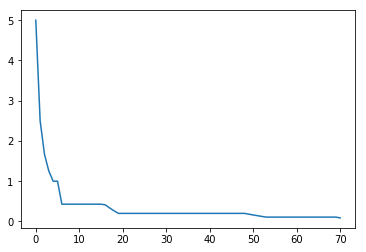

In [5]:
result_br = solve_brown_robinson(C, requred_epsilon=0.1)
result_an = solve_analytically(C)
print('Iterations:', result_br['iterations'])
plt.plot(result_br['history'])
print('epsilon:', result_br['epsilon'])
print('(v_overline, v_underline):', result_br['v_overline'], result_br['v_underline'])
print('analytical v:', result_an['v'])
print('analytical x_strategies:', result_an['x_strategies'], '; sum:', np.sum(result_an['x_strategies']))
print('analytical y_strategies:', result_an['y_strategies'], '; sum:', np.sum(result_an['y_strategies']))
print('BR x_strategies:', result_br['x_strategies'], '; sum:', np.sum(result_br['x_strategies']))
print('BR y_strategies:', result_br['y_strategies'], '; sum:', np.sum(result_br['y_strategies']))
print('delta v_overline:', np.abs(result_an['v'] - result_br['v_overline']))
print('delta v_underline', np.abs(result_an['v'] - result_br['v_underline']))
print('delta x_strategies:', np.abs(result_an['x_strategies'] - result_br['x_strategies']))
print('delta y_strategies:', np.abs(result_an['y_strategies'] - result_br['y_strategies']))